# Introduction
You will learn how to handle basic data using the world-famous data set of machine learning and data analysis called "Fisher's Iris".


This is data from the following three types of irises, totaling 150, collected on the same day in a pasture on the Gaspé Peninsula, Canada.



In [20]:
#Imports and Predefines
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

#setttings
pd.set_option("max_rows", 7)

# Problem 1
## Data acquisition

In [21]:
iris = datasets.load_iris()
X = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])
X.columns = X.columns.str.replace('( )*\(cm\)','', regex= True)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = pd.DataFrame(data = iris['target'], columns = ['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


# Problem 2
## Combining Data

In [23]:
df = pd.concat([X,y], axis = 1)
df.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Problem 3
## Checking Data 

In [24]:
print('4 th sample: \n', df.iloc[3])

4 th sample: 
 sepal length    4.6
sepal width     3.1
petal length    1.5
petal width     0.2
Species         0.0
Name: 3, dtype: float64


In [25]:
print('Sample count: \n', df.count())

Sample count: 
 sepal length    150
sepal width     150
petal length    150
petal width     150
Species         150
dtype: int64


In [26]:
print('Does not have null?',df.notnull().all().all())

Does not have null? True


In [27]:
df.describe()

,sepal length,sepal width,petal length,petal width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
...,...,...,...,...,...
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Problem 4
## Extra Information On dataset

### General Information:
Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Problem 5
## Extracting Data

In [28]:
a = df.loc[:,'sepal width']
b = df['sepal width']
c = df.iloc[:, 1]
print('Getting column "sepal width"')
print(f'3 Methods have the same column output? {(a==b).all() and (b==c).all()}')
c.head()


Getting column "sepal width"
3 Methods have the same column output? True


0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width, dtype: float64

In [29]:
print('55th to 99th data \n', df.iloc[54:98,:])

55th to 99th data 
     sepal length  sepal width  petal length  petal width  Species
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
..           ...          ...           ...          ...      ...
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1

[44 rows x 5 columns]


In [30]:
print('55th to 99th data of petal column \n', df['petal length'].iloc[54:98])

55th to 99th data of petal column 
 54    4.6
55    4.5
56    4.7
     ... 
95    4.2
96    4.2
97    4.3
Name: petal length, Length: 44, dtype: float64


In [31]:
df.loc[df['petal width'] == 0.2]

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
...,...,...,...,...,...
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


# Problem 6
## Creating Diagram

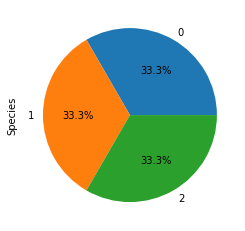

In [32]:
df['Species'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

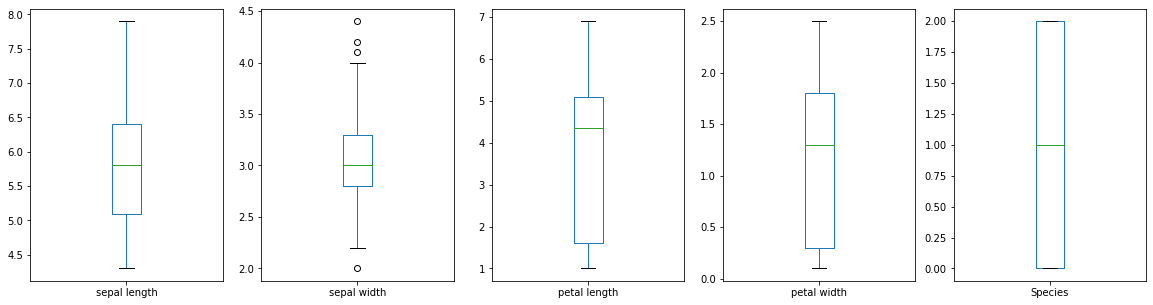

In [33]:
df.plot(kind = 'box', subplots = True, figsize = [20,5])
plt.show()

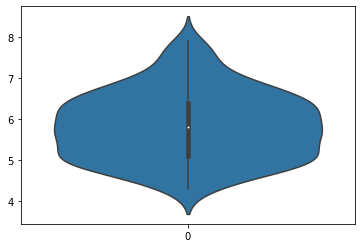

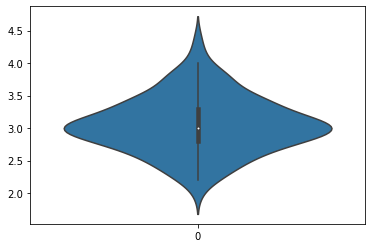

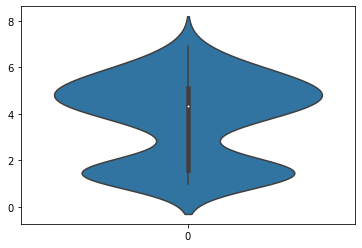

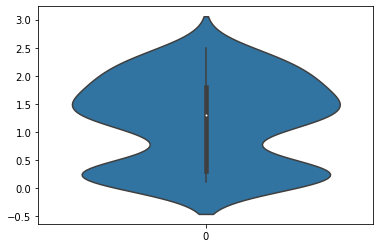

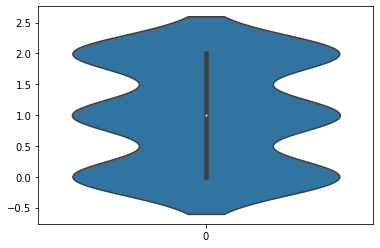

In [34]:
# sns.violinplot(data = df,split=True)
# plt.show()
for feature in df.columns:
    sns.violinplot(data = df[feature])
    plt.show()

### Difference between violin plot and box plot: Box plot show important value (mean, IQR, outlier) while violin shows the whole distribution

Both are good to have a visual look at the distribution as well as important values (mean, ...)

## NOTE: On problem 6
- I notice that in sns's plot function, we have key-argument that will be passed to matplotlib's plot function. This suggests that sns is backed by plt. Though the docs 
- But one thing that i do not quite understand yet is how sns work with the things we already know about plt. Where's the figure() or axis() or plt.plot()? Cause the mentors already told us about how a plot in plt is made (the basic life cycle right - fig->plot->show). But how does it work here with seaborn? I'd love to know.

# Problem 7
## Correlation

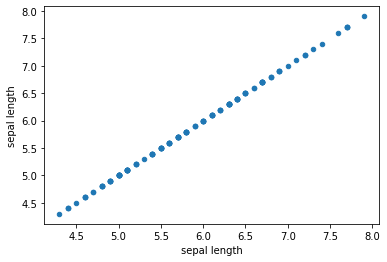

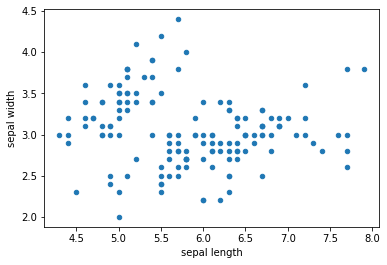

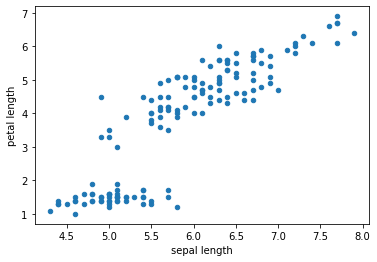

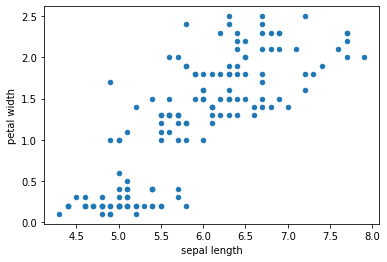

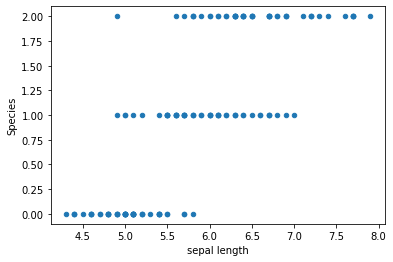

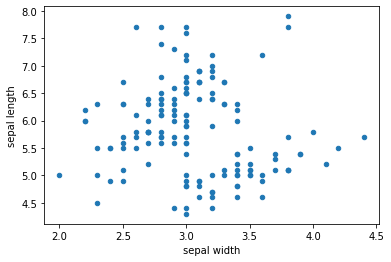

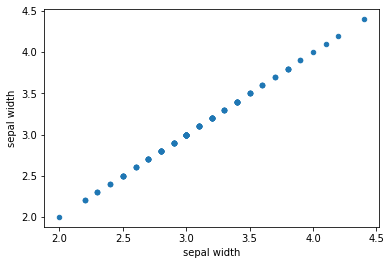

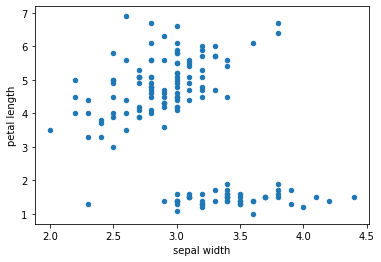

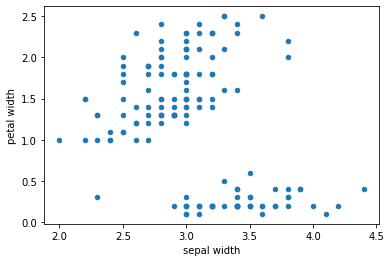

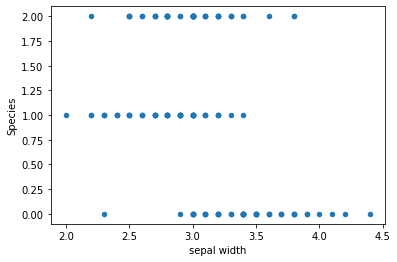

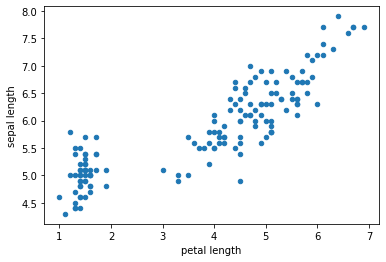

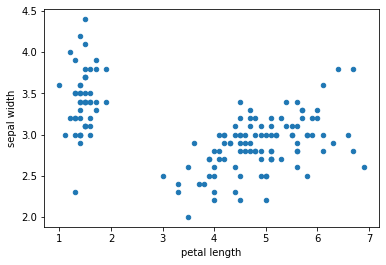

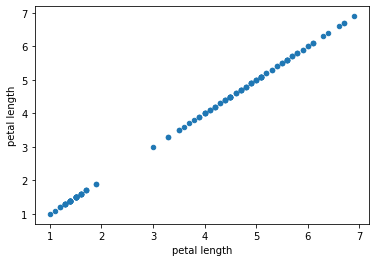

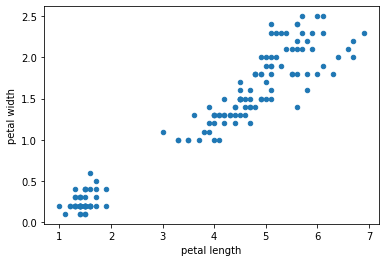

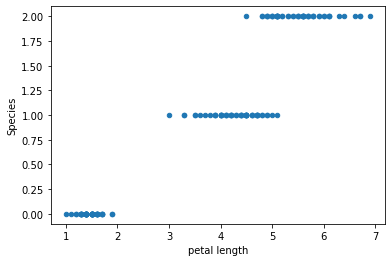

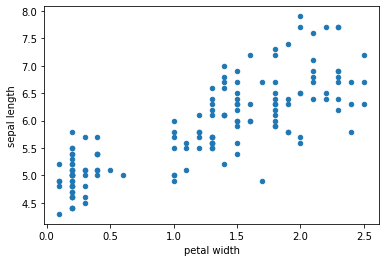

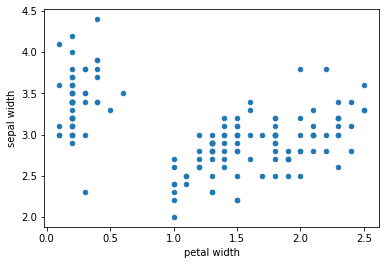

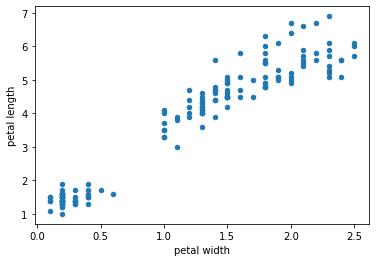

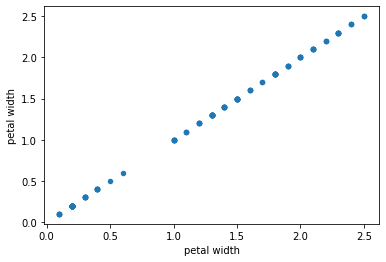

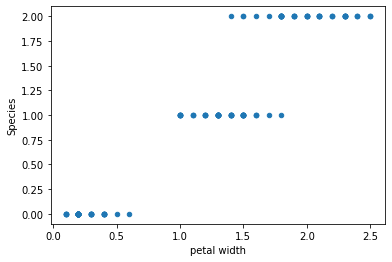

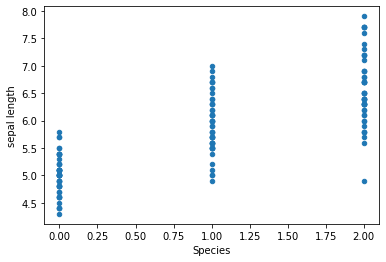

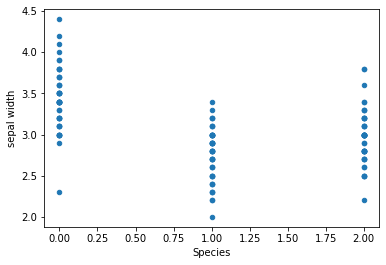

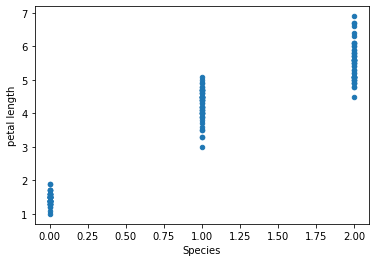

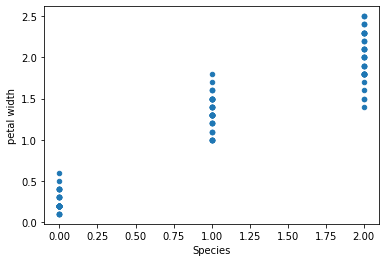

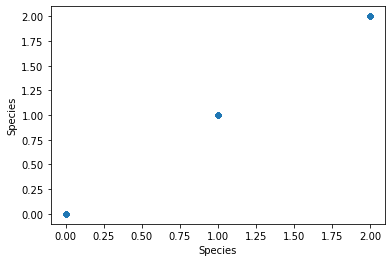

In [39]:
for f1 in df.columns:
    for f2 in df.columns:
        df.plot(kind = 'scatter', x= f1, y = f2)
        plt.show()

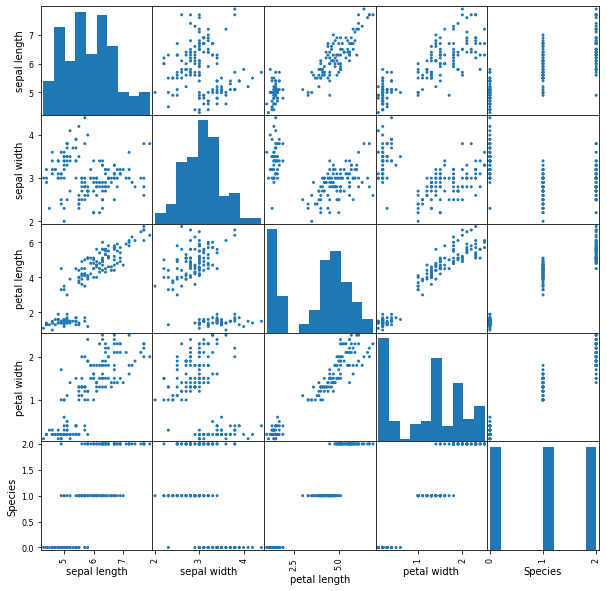

In [36]:
pd.plotting.scatter_matrix(df, alpha=1,figsize=[10,10]);

In [37]:
df.iloc[:, 0:4].corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

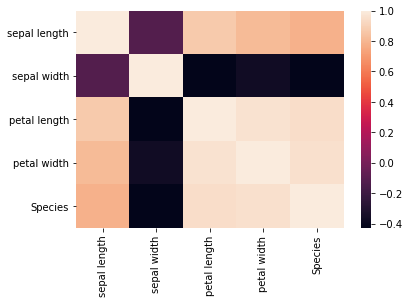

In [38]:
sns.heatmap(df.corr())

# Problem 8
## Explaining things

### Some Observations I have:
- From the scatter matrix (and also the correlation heatmap), it can be seen that many attributes have strong possitive correlation with each other. Such as: petal width - petal length, petal width - species, petal length- species, petal width - sepal length (a bit weaker)...
- sepal width seems distribute simmilarly to normal distribution while others are a bit discrete.
- sepal width shows a negative correlation with other but the correlation is weak, not very descriptive.
- It can also be seen from the scatter plots that species have distictive values in some features specifically petal length and petal width where most members of a class are in the same range of feature values. These range also not overlap by alot suggesting major difference. 